In [13]:
import numpy as np
import nengo
import matplotlib.pyplot as plt
import nengo_spa
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import scipy.misc
from scipy import ndimage

import sys, os
sys.path.append(os.path.join('..', 'scripts'))
import figure_utils as utils
from sspspace import HexagonalSSPSpace,SSPSpace


Text(0.75, 0.97, 'Inference pattern of plane waves')

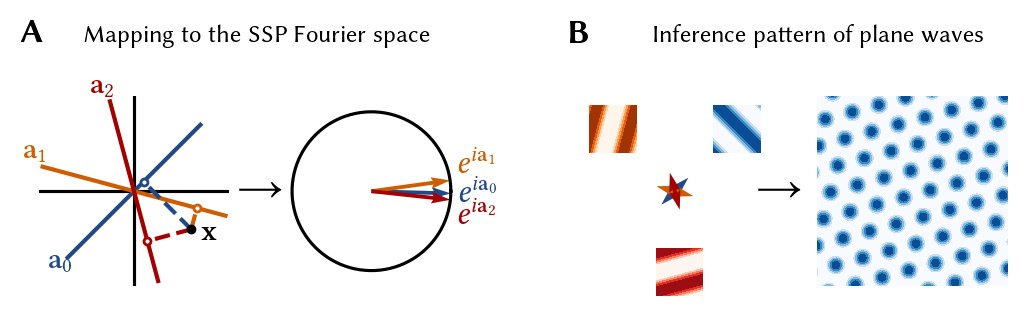

In [14]:
domain_dim = 2
bounds = np.tile([-1,1],(domain_dim,1))

ssp_space = HexagonalSSPSpace(domain_dim, n_scales=1,n_rotates=1,domain_bounds=bounds,
                                     length_scale=0.01)
d = ssp_space.ssp_dim
pt = np.array([0.6,-0.4])

xaxis = np.linspace(-1,1,100)
K = ssp_space.phase_matrix[1:,:]
K = 0.05*K/np.sum(K**2,axis=1).reshape(-1,1)
ys = (K[:3,1]/K[:3,0]).reshape(-1,1)*xaxis.reshape(1,-1)

fig, axs = plt.subplots(figsize=(6.25, 6.25/4),ncols = 5, gridspec_kw={'width_ratios':[1,1,0.1,1,1]})
fig.subplots_adjust(wspace=0.3)
mycols = [utils.blues[0],utils.oranges[0],utils.reds[0]]

for ax in axs:
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.axis('off') 
    ax.set_aspect('equal')
ax = axs[0]
ax.axhline(0, color='k')
ax.axvline(0, color='k')

for i in range(3):
    xy = np.array([xaxis, ys[i,:]])
    myxy = xy[:,np.sum(xy**2, axis=0)<=1]
    ax.plot(myxy[0,:],myxy[1,:], color=mycols[i],linewidth=1.5,zorder=2)
    proj = K[i,:]*np.dot(K[i,:],pt)/np.dot(K[i,:],K[i,:])
    ax.plot([pt[0],proj[0]],[pt[1],proj[1]],'--',color=mycols[i],linewidth=1.5,zorder=3)
    ax.plot(proj[0],proj[1],'.',markerfacecolor='white',markeredgecolor=mycols[i],markersize=5,zorder=4)
    
    ax.text(myxy[0,0] + 0.2*np.sign(myxy[0,0]),
            myxy[1,0] + 0.1*np.sign(myxy[1,0]),'$\mathbf{a}_' + str(i) + '$', color=mycols[i],fontsize=11)
    myxy[:,-1]
    

ax.plot(pt[0],pt[1],'.',color='k',markersize=5,zorder=5)
ax.text(pt[0] + 0.1*np.sign(pt[0]), pt[1] + 0.1*np.sign(pt[1]),'$\mathbf{x}$',fontsize=11)
ax.axis('off')

ax2 = axs[1]
thetas = np.linspace(0,2*np.pi,100)
ax2.set_xlim(-1.2,1.2)
ax2.set_ylim(-1.2,1.2)
ax2.plot(np.cos(thetas),np.sin(thetas),color='k')
for i in range(3):
    phasor = np.exp(1j*np.dot(K[i,:],pt))
    ax2.quiver(0,0,phasor.real,phasor.imag,angles='xy', scale_units='xy', scale=1,width=0.02,color=mycols[i])
    if i==2:
        scalex = 0.3
    else:
        scalex = 0.1
    ax2.text(phasor.real + 0.1*np.sign(phasor.real),
            phasor.imag +scalex*np.sign(phasor.imag),'$e^{i\mathbf{a}_' + str(i) + '}$', 
             color=mycols[i],fontsize=12)
  

fig.text(0.285, 0.465, '$\\rightarrow$', size=15, va="baseline", ha="left")


X,Y=np.meshgrid(xaxis,xaxis)

colnames = ['Blues','Oranges','Reds']
poss = [[0.7,0.7],[0.05,0.7],[0.4,-0.05]]

ax3 = axs[3]
for i in range(3):
    ax3.quiver(0,0, K[i,0], K[i,1],angles='xy', scale_units='xy', scale=1,width=0.02,color=mycols[i])
    ax3.quiver(0,0, -K[i,0], -K[i,1],angles='xy', scale_units='xy', scale=1,width=0.02,color=mycols[i])
    
    sub_ssp_space = SSPSpace(domain_dim,3,phase_matrix = np.vstack([np.array([[0,0]]), K[i,:],-K[i,:]]),
                                     length_scale=0.05)
    sspt = sub_ssp_space.encode(pt)
    manysspts = sub_ssp_space.encode(np.vstack([X.reshape(-1),Y.reshape(-1)]).T)
    
    axins = ax3.inset_axes([poss[i][0],poss[i][1],0.25,0.25])
    axins.axis('off')
    axins.contourf(X,Y,np.sum(sspt * manysspts,axis=1).reshape(X.shape), vmin=0.1, cmap=colnames[i])

ssp_space.similarity_plot(ssp_space.encode(pt), cmap='Blues',plot_type='contourf',vmin=0.1,ax=axs[4] )
fig.text(0.7, 0.465, '$\\rightarrow$', size=15, va="baseline", ha="left")

fig.text(0.11, 0.97, '\\textbf{A}', size=12, va="baseline", ha="left")
fig.text(0.3, 0.97, "Mapping to the SSP Fourier space", va="baseline", ha="center")
fig.text(0.55, 0.97, '\\textbf{B}', size=12, va="baseline", ha="left")
fig.text(0.75, 0.97, "Inference pattern of plane waves", va="baseline", ha="center")
# utils.save(fig, "ssp_mapping.pdf")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.82, 0.63, 'Wall query')

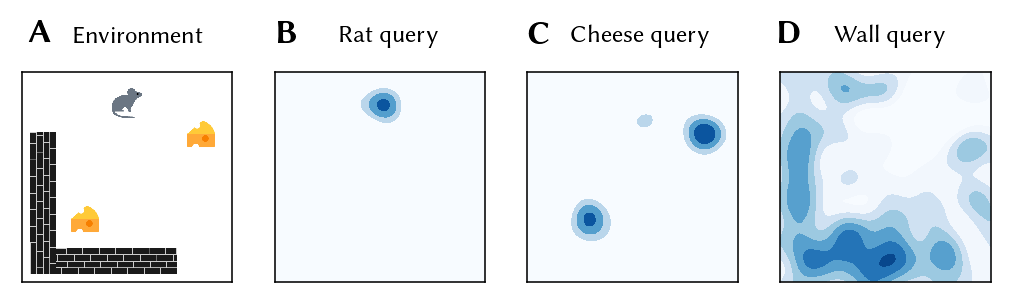

In [16]:
domain_dim = 2
bounds = np.tile([-1,1],(domain_dim,1))
ssp_space = HexagonalSSPSpace(domain_dim, n_scales=10,n_rotates=5,
                                      scale_min=0.1,scale_max=3.1,domain_bounds = bounds,
                                     length_scale=0.2)
d = ssp_space.ssp_dim

# plt.figure()
# ssp_space.similarity_plot(ssp_space.encode(np.array([[0.75,0]])), cmap='Blues',plot_type='contourf')


wall_boundaries = np.array([ [[-0.8,-0.65],[-0.7,0.5]], [[-0.9,0.5],[-0.8,-0.65]] ])
n_walls = wall_boundaries.shape[0]
wall_ssps = np.zeros((n_walls,d))

nsamples=[1,50,50,1]
for j in range(n_walls):
    xvals = np.linspace(wall_boundaries[j,0,0],wall_boundaries[j,0,1],nsamples[2*j])
    yvals = np.linspace(wall_boundaries[j,1,0], wall_boundaries[j,1,1],nsamples[2*j+1] )
    X,Y=np.meshgrid(xvals,yvals)
    wall_ssps[j,:] = ssp_space.normalize(np.sum(ssp_space.encode(np.vstack([X.reshape(-1),Y.reshape(-1)]).T), axis=0))

# plt.figure()
# mappable=ssp_space.similarity_plot(ssp_space.normalize(np.sum(wall_ssps,axis=0)), cmap='Blues',plot_type='contourf',vmin=0.1)
# plt.colorbar(mappable)

sp_vecs = nengo_spa.vector_generation.EquallySpacedPositiveUnitaryHrrVectors(d=d,n=3,offset=0.111).vectors


x = [0,0.7,-0.4, -0.2, -0.8]
y = [0.7,0.4,-0.4, -0.8, -0.25]


rat_loc = np.array([[x[0],y[0]]])  
rat_ssp = ssp_space.encode(rat_loc)


cheese_loc = np.array([[x[1],y[1]],[x[2],y[2]]]) 
cheese_ssp = np.sum(ssp_space.encode(cheese_loc),axis=0)
M = (ssp_space.bind(rat_ssp, sp_vecs[0]) + ssp_space.bind(cheese_ssp, sp_vecs[1])
     + ssp_space.bind(np.sum(wall_ssps,axis=0), sp_vecs[2]))

def getImage(path,zoom=.1,rotate=0):
    img = plt.imread('images/' + path + '.png', format="png")
    rotated_img = ndimage.rotate(img, rotate)
    return OffsetImage(rotated_img, zoom=zoom, zorder=1)

fig, axs = plt.subplots(figsize=(6.25, 3*1.65),ncols=4)

for i in range(4):
    axs[i].set_xlim(-1,1)
    axs[i].set_ylim(-1,1)
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_aspect('equal')
    axs[i].spines['right'].set_visible(True)
    axs[i].spines['top'].set_visible(True)

zs = np.array([.1,.1,.1, .019, .019])
ds = [0,0,0, 0, 90]
paths = ['rat','cheese','cheese', 'wall', 'wall']
for x0, y0, path, zoom, degree in zip(x, y, paths, zs, ds):
    ab = AnnotationBbox(getImage(path,zoom=zoom, rotate=degree), (x0, y0), frameon=False)
    axs[0].add_artist(ab)


vmin = 0.2
res = ssp_space.normalize(ssp_space.bind(M, ssp_space.invert(sp_vecs[0])))
ssp_space.similarity_plot(res, cmap='Blues',plot_type='contourf',vmin=vmin,ax=axs[1])#vmin=vmin,

res = ssp_space.normalize(ssp_space.bind(M, ssp_space.invert(sp_vecs[1])))
ssp_space.similarity_plot(res, cmap='Blues',plot_type='contourf',vmin=vmin,ax=axs[2])

res =ssp_space.bind(M, ssp_space.invert(sp_vecs[2]))
ssp_space.similarity_plot(res, cmap='Blues',plot_type='contourf',vmin=vmin,ax=axs[3])

fig.text(0.13, 0.63, '\\textbf{A}', size=12, va="baseline", ha="left")
fig.text(0.33,0.63, '\\textbf{B}', size=12, va="baseline", ha="left")
fig.text(0.53,0.63, '\\textbf{C}', size=12, va="baseline", ha="left")
fig.text(0.73,0.63, '\\textbf{D}', size=12, va="baseline", ha="left")

fig.text(0.22, 0.63, "Environment", va="baseline", ha="center")
fig.text(0.42, 0.63, "Rat query", va="baseline", ha="center")
fig.text(0.62, 0.63, "Cheese query", va="baseline", ha="center")
fig.text(0.82, 0.63, "Wall query", va="baseline", ha="center")

# utils.save(fig, "ssp_object_query.pdf")